Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS)- AI (Artificial Intelligence): Machines mimicking human intelligence to perform tasks.
- ML (Machine Learning): A subset of AI where machines learn from data without being explicitly programmed.
- Deep Learning (DL): A subset of ML using neural networks with many layers for complex pattern recognition.
- Data Science (DS): A field extracting insights from data using techniques like ML, stats, and more.

Question 2: What are the types of machine learning? Describe each with one real-world example.- Supervised Learning: Model learns from labeled data. Example: Email spam detection.
- Unsupervised Learning: Model finds patterns in unlabeled data. Example: Customer segmentation.
- Reinforcement Learning: Model learns by interacting with an environment. Example: Game playing AI.

Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.- Overfitting: Model performs well on training data but poorly on new data.
- Underfitting: Model performs poorly on both training and new data.
- Bias-Variance Tradeoff: Balancing model complexity to minimize both bias (error due to simplification) and variance (error due to complexity).

Question 4: What are outliers in a dataset, and list three common techniques for handling them.- Outliers: Data points significantly different from others.
- Techniques:
    1. Remove outliers: Delete them if they're errors.
    2. Transform data: Use log transforms to reduce impact.
    3. Use robust methods: Choose algorithms less affected by outliers.

Question 5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.- Handling missing values involves identifying, analyzing, and imputing or removing them.
- Numerical: Impute using mean/median.
- Categorical: Impute using mode.

 Question 6: Write a Python program that:
    - Creates a synthetic imbalanced dataset with make_classification() from sklearn.datasets.
    - Prints the class distribution.


In [2]:
from sklearn.datasets import make_classification
import numpy as np

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

# Print class distribution
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

Class distribution: {np.int64(0): np.int64(895), np.int64(1): np.int64(105)}


Question 7: Implement one-hot encoding using pandas for the following list of colors: ['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.

In [3]:
import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame(colors, columns=['Color'])

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Color'])
print(df_encoded)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


    Question 8: Write a Python script to:
    - Generate 1000 samples from a normal distribution.
    - Introduce 50 random missing values.
    - Fill missing values with the column mean.
    - Plot a histogram before and after imputation.

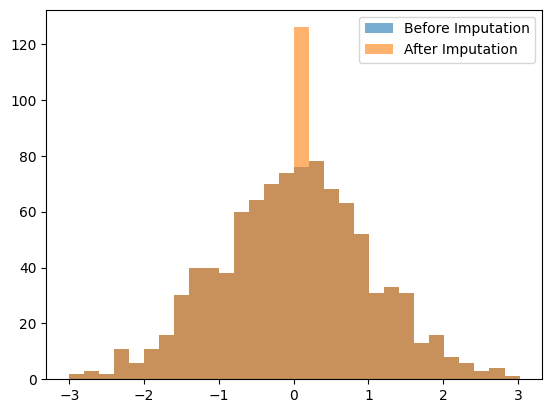

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 normal samples
data = np.random.randn(1000)

# Introduce 50 random missing values
missing_indices = np.random.choice(1000, 50, replace=False)
data[missing_indices] = np.nan

# Plot before imputation
plt.hist(data[~np.isnan(data)], bins=30, alpha=0.6, label="Before Imputation")

# Fill missing values with mean
mean_value = np.nanmean(data)
data[np.isnan(data)] = mean_value

# Plot after imputation
plt.hist(data, bins=30, alpha=0.6, label="After Imputation")
plt.legend()
plt.show()

Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15, 20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[2], [5], [10], [15], [20]])

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

print("Scaled Data:\n", scaled)

Scaled Data:
 [[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


Question 10 :You are working as a data scientist for a retail company. You receive a customer transaction dataset that contains:
- Missing ages,
- Outliers in transaction amount,
- A highly imbalanced target (fraud vs. non-fraud).
- Categorical variables like payment method.
ans-

1.Missing Ages

Ages column has some missing values.

Solution → Fill them with median (better than mean for ages).



2. Outliers in Transaction Amount

Some transactions are too high or too low compared to normal.

Solution → Detect outliers using IQR (Interquartile Range) or Z-score, then remove them or cap them at a limit.



3. Imbalanced Target (Fraud vs Non-Fraud)

Fraud cases are very few compared to non-fraud.

Solution → Use techniques like SMOTE (oversample minority) or give class weights in ML model.



4. Categorical Variables (Payment Method)

Payment method is text data (e.g., Cash, Card, UPI).

Solution → Convert into numbers using One-Hot Encoding.

In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Example data
data = {
    "age": [25, np.nan, 30, 40, np.nan, 22],
    "transaction_amount": [100, 50000, 150, 2000, 120, 300],
    "payment_method": ["Card", "Cash", "UPI", "Card", "Cash", "UPI"],
    "fraud": [0, 0, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

print("Original Data:\n", df)

# 1. Handle missing ages → fill with median
imputer = SimpleImputer(strategy="median")
df["age"] = imputer.fit_transform(df[["age"]])

# 2. Handle outliers → cap values using IQR
Q1 = df["transaction_amount"].quantile(0.25)
Q3 = df["transaction_amount"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df["transaction_amount"] = np.where(df["transaction_amount"] > upper_limit, upper_limit, df["transaction_amount"])

# 3. Encode payment_method → One-Hot Encoding
encoder = OneHotEncoder(drop="first")
encoded = encoder.fit_transform(df[["payment_method"]])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(["payment_method"]))
df = pd.concat([df.drop("payment_method", axis=1), encoded_df], axis=1)

# 4. Handle imbalance → SMOTE
X = df.drop("fraud", axis=1)
y = df["fraud"]

smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nCleaned Data:\n", df)
print("\nBalanced Fraud Distribution:\n", y_resampled.value_counts())

Original Data:
     age  transaction_amount payment_method  fraud
0  25.0                 100           Card      0
1   NaN               50000           Cash      0
2  30.0                 150            UPI      0
3  40.0                2000           Card      1
4   NaN                 120           Cash      0
5  22.0                 300            UPI      1


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2